In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  

%matplotlib inline

df = pd.read_csv('netflix_titles.csv')

In [6]:
df['date_added'] = df['date_added'].astype(str).str.strip()

df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0


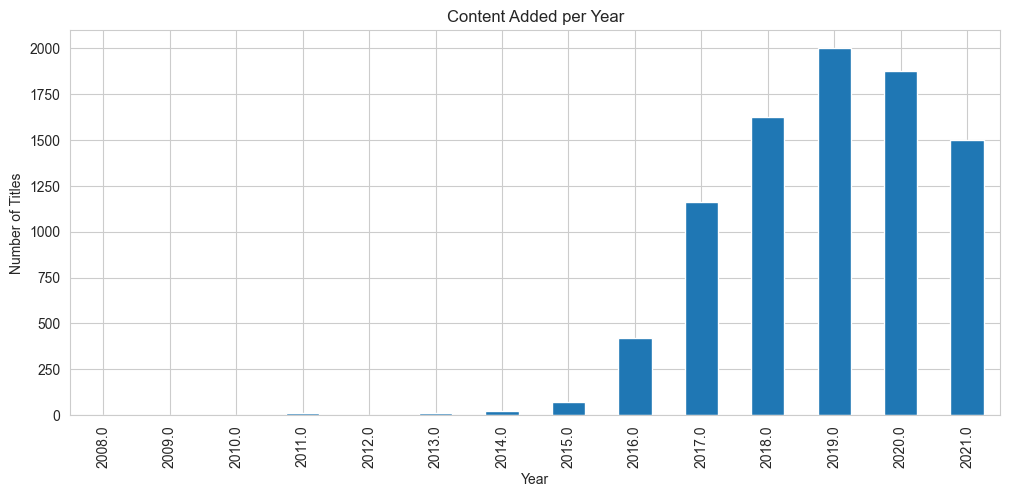

In [19]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), title='Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


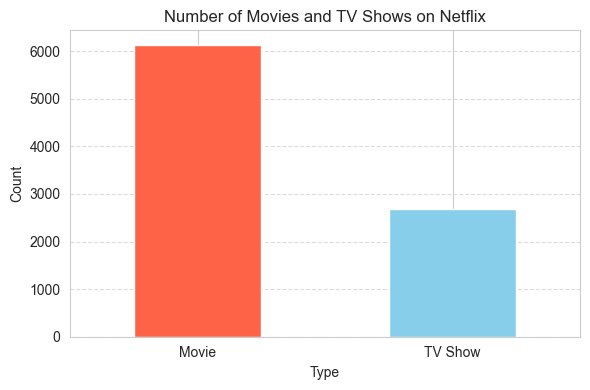

In [20]:
# Count of Movies vs TV Shows
content_count = df['type'].value_counts()
print(content_count)


plt.figure(figsize=(6,4))
content_count.plot(kind='bar', color=['tomato', 'skyblue'])
plt.title('Number of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


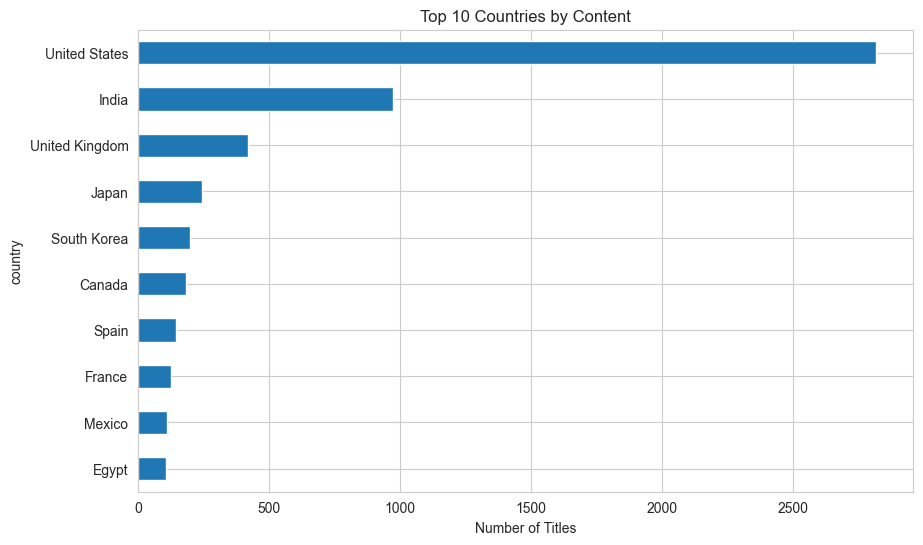

In [21]:
#Top 10 Contributing Countries

top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', figsize=(10,6), title='Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()




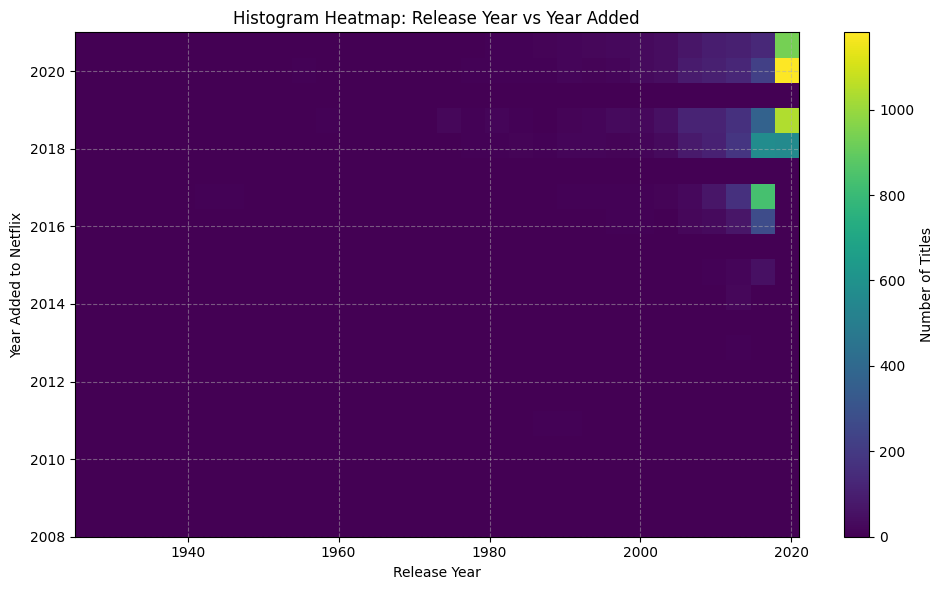

In [3]:
df_clean = df.dropna(subset=['year_added', 'release_year'])

# Plot 2D histogram as heatmap
plt.figure(figsize=(10, 6))
plt.hist2d(df_clean['release_year'], df_clean['year_added'], bins=(30, 20), cmap='viridis')

# Add labels and colorbar
plt.colorbar(label='Number of Titles')
plt.xlabel('Release Year')
plt.ylabel('Year Added to Netflix')
plt.title('Histogram Heatmap: Release Year vs Year Added')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

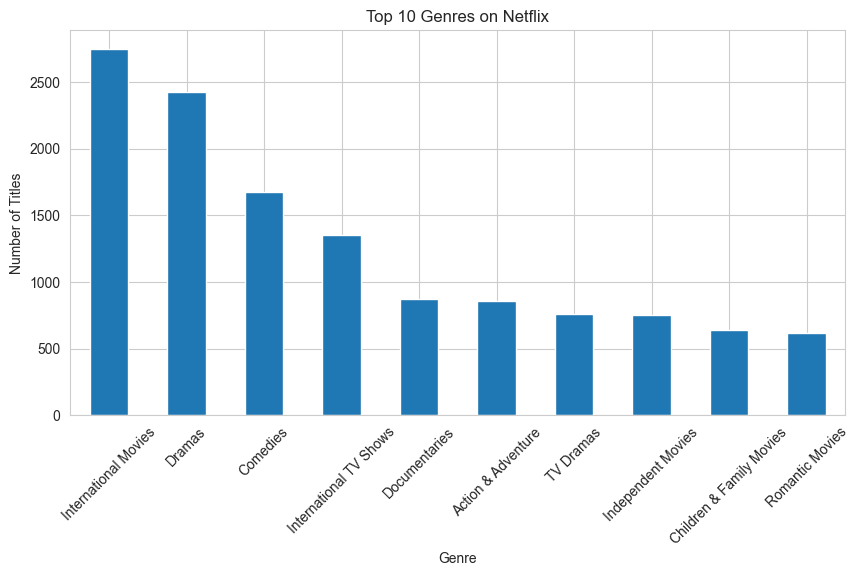

In [23]:
genres = df['listed_in'].dropna().str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)

top_genres.plot(kind='bar', figsize=(10,5), title='Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


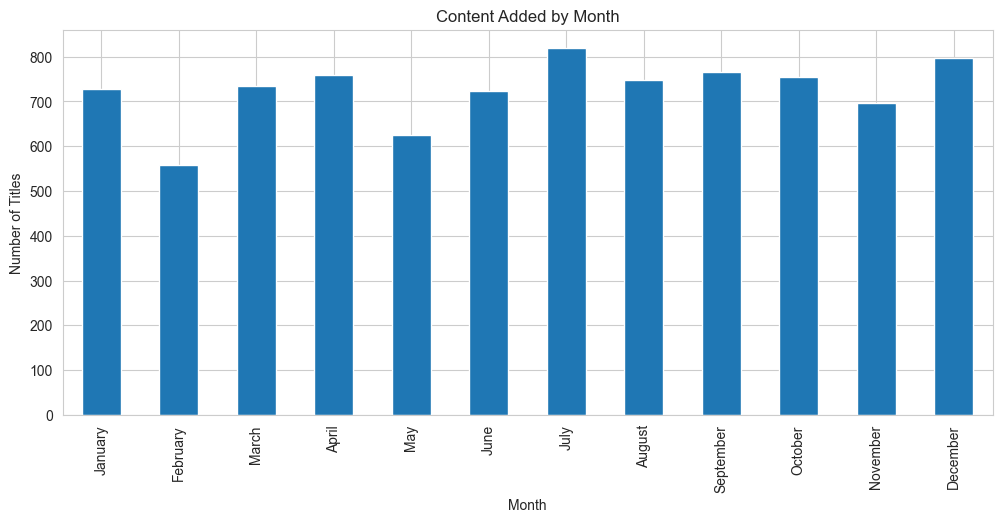

In [24]:
df['month_added'] = df['date_added'].dt.month_name()
monthly_trend = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_trend.plot(kind='bar', figsize=(12,5), title='Content Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Aditya Rai\AppData\Local\Temp\ipykernel_9700\2501861680.py:7: SyntaxWarning: invalid escape sequence '\d'
  movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)


<Figure size 1500x600 with 0 Axes>

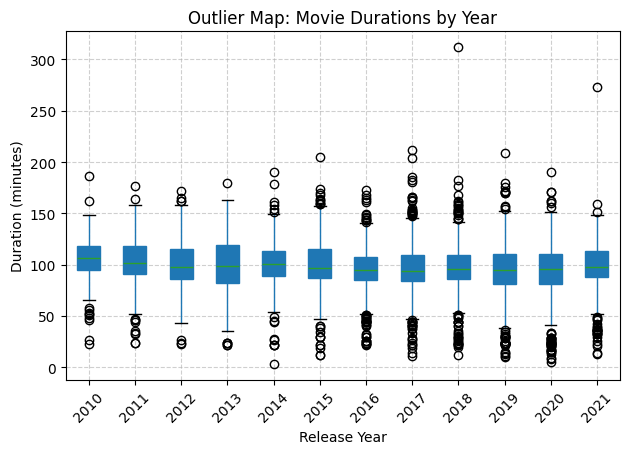

In [5]:
movies_df = df[df['type'] == 'Movie'].copy()

# Ensure 'duration' is a string before using .str
movies_df['duration'] = movies_df['duration'].astype(str)

# Extract numeric duration (in minutes)
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Clean 'release_year' just in case
movies_df['release_year'] = pd.to_numeric(movies_df['release_year'], errors='coerce')

# Drop rows with missing values in required columns
box_data = movies_df.dropna(subset=['release_year', 'duration_minutes'])

# Optional: focus on recent years for clarity
recent = box_data[box_data['release_year'] >= 2010]

# Plot Outlier Map (Boxplot)
plt.figure(figsize=(15, 6))
recent.boxplot(column='duration_minutes', by='release_year', grid=True, patch_artist=True)

# Styling
plt.title('Outlier Map: Movie Durations by Year')
plt.suptitle('')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

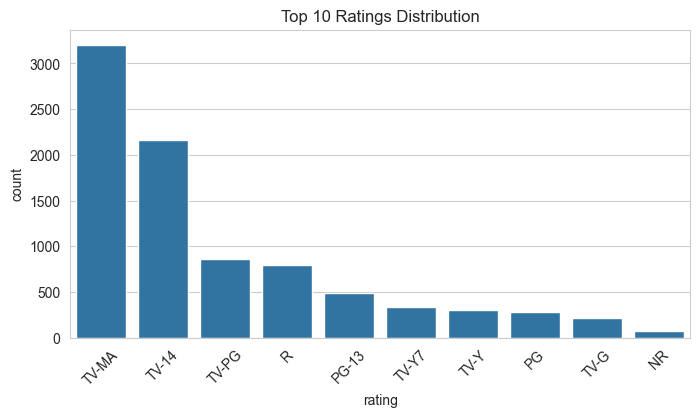

In [26]:
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index[:10])
plt.title("Top 10 Ratings Distribution")
plt.xticks(rotation=45)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Aditya Rai\AppData\Local\Temp\ipykernel_13352\841159482.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


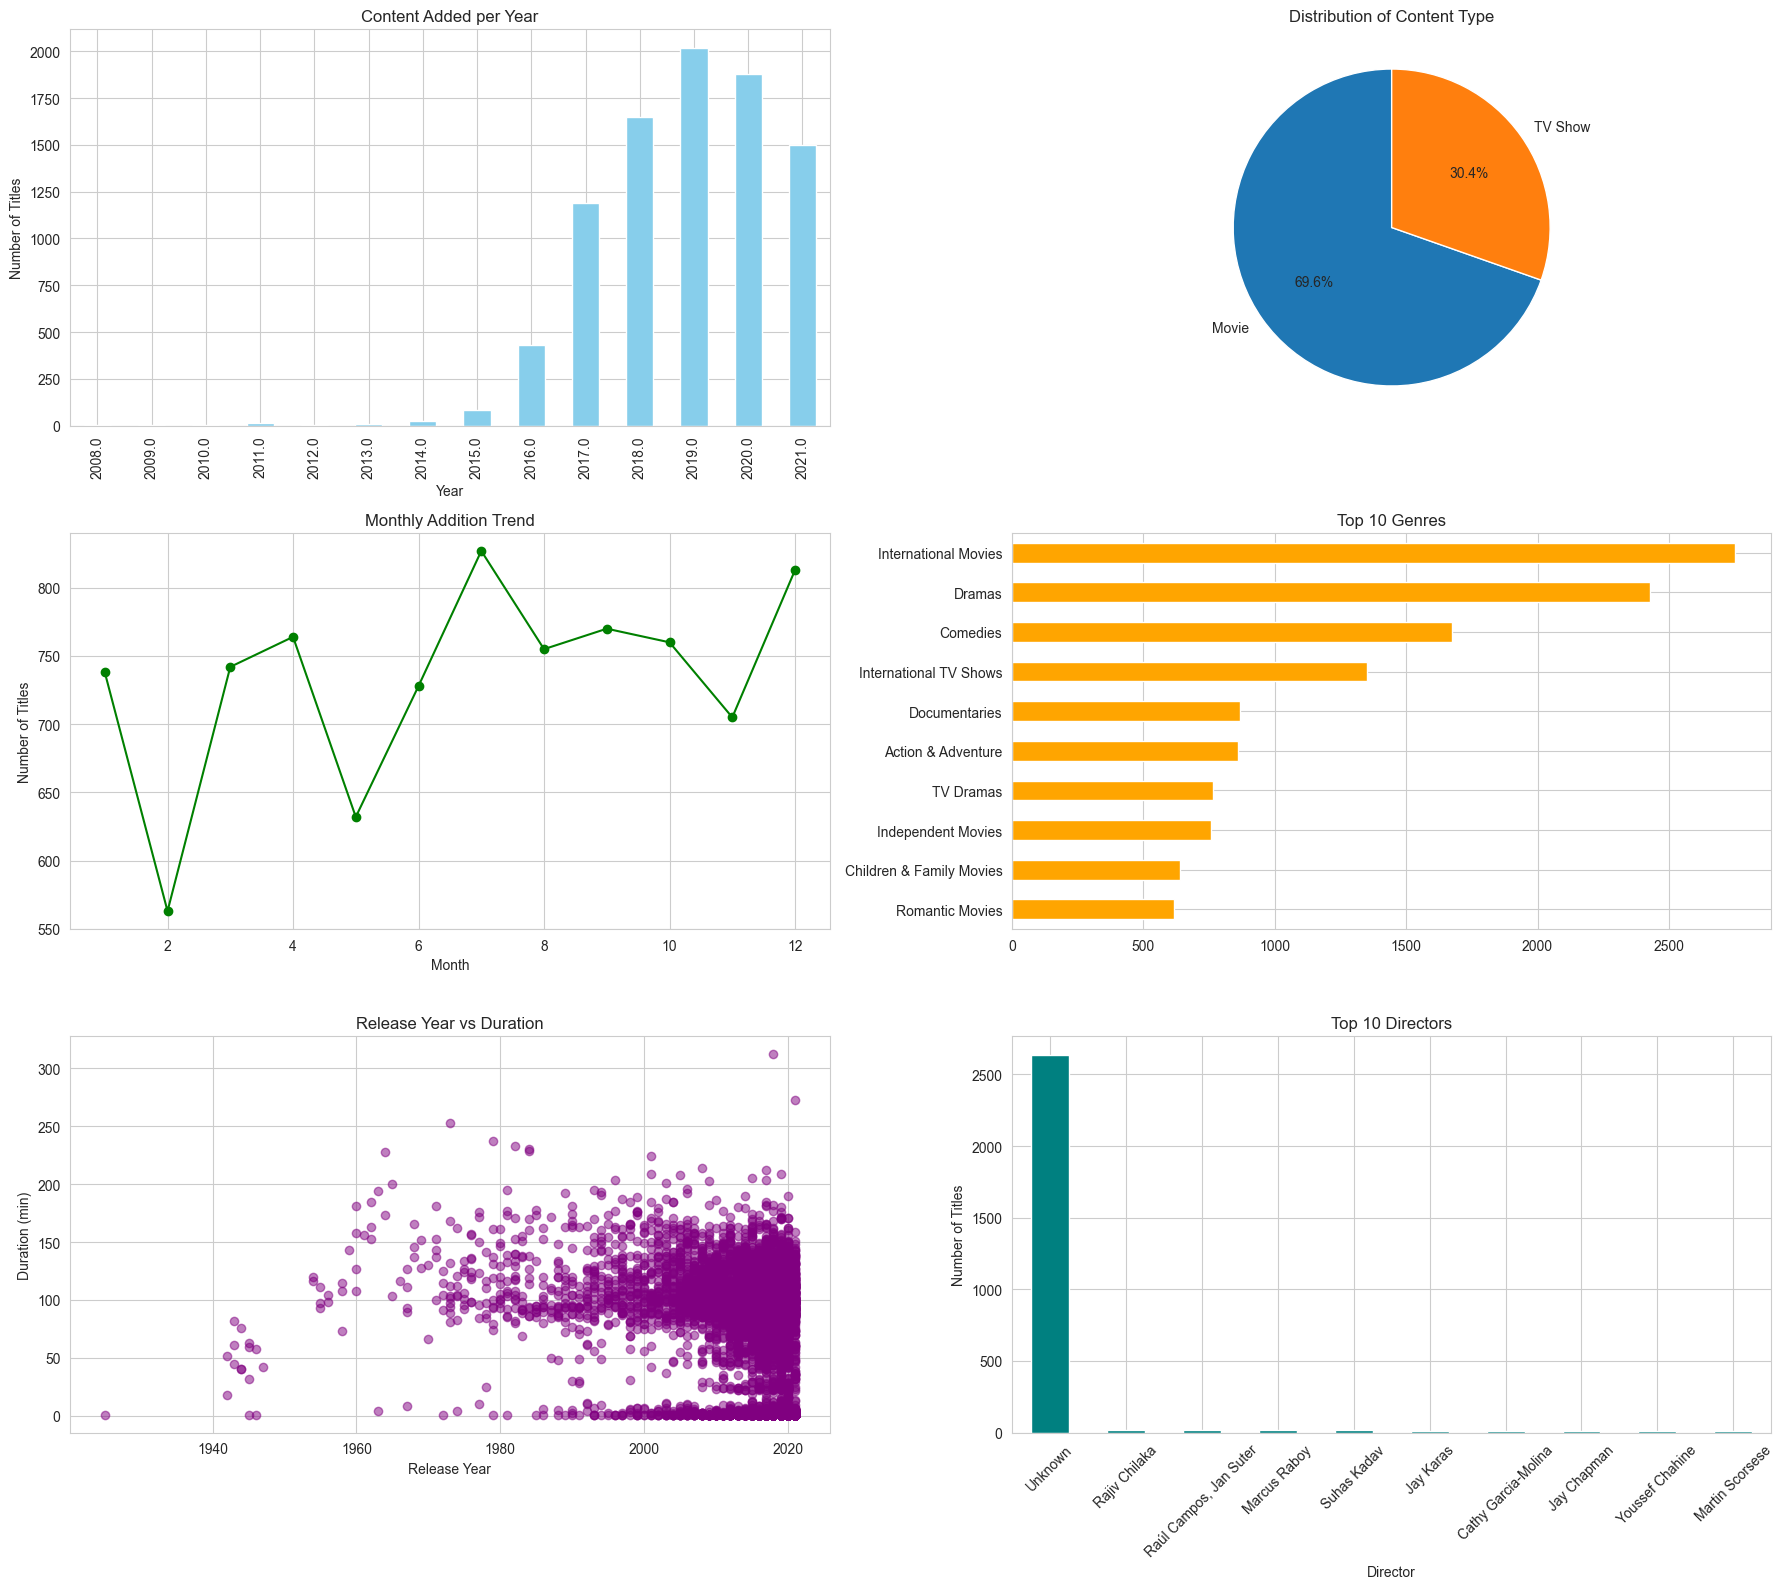

In [5]:
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


fig, axs = plt.subplots(3, 2, figsize=(18, 16))  # 3 rows, 2 cols


df['year_added'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Content Added per Year')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of Titles')


df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axs[0, 1])
axs[0, 1].set_ylabel('')
axs[0, 1].set_title('Distribution of Content Type')


monthly_trend = df['month_added'].value_counts().sort_index()
axs[1, 0].plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='green')
axs[1, 0].set_title('Monthly Addition Trend')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Titles')


df['listed_in'] = df['listed_in'].fillna('Unknown')
genre_counts = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
genre_counts.plot(kind='barh', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Top 10 Genres')
axs[1, 1].invert_yaxis()

df.dropna(subset=['release_year', 'duration_num'], inplace=True)
axs[2, 0].scatter(df['release_year'], df['duration_num'], alpha=0.5, color='purple')
axs[2, 0].set_title('Release Year vs Duration')
axs[2, 0].set_xlabel('Release Year')
axs[2, 0].set_ylabel('Duration (min)')


df['director'] = df['director'].fillna('Unknown')
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='bar', ax=axs[2, 1], color='teal')
axs[2, 1].set_title('Top 10 Directors')
axs[2, 1].set_xlabel('Director')
axs[2, 1].set_ylabel('Number of Titles')
axs[2, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()